In [ ]:
import tensorflow as tf

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(10,activation='softmax')])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2997 - accuracy: 0.9120
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1456 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1081 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0873 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0752 - accuracy: 0.9762


In [ ]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9775


In [ ]:
print(test_loss)
print(test_accuracy)

0.07279220223426819
0.9775000214576721


In [ ]:
#project 1
#convert image to greyscall using CNN
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#load the RGB image
image_path="/content/image2.jpeg"
original_image=load_img(image_path, target_size=(224,224))
original_array=img_to_array(original_image)
original_array=original_array/255.0
print(original_array)

[[[1.         0.8666667  0.654902  ]
  [1.         0.87058824 0.6313726 ]
  [0.99215686 0.8784314  0.5803922 ]
  ...
  [0.9764706  0.8627451  0.49411765]
  [0.9490196  0.8235294  0.42745098]
  [0.972549   0.7647059  0.3882353 ]]

 [[1.         0.8745098  0.6431373 ]
  [1.         0.8784314  0.62352943]
  [0.99607843 0.8901961  0.5882353 ]
  ...
  [0.9843137  0.87058824 0.5019608 ]
  [0.9529412  0.8392157  0.4392157 ]
  [1.         0.83137256 0.4509804 ]]

 [[1.         0.89411765 0.6156863 ]
  [1.         0.8980392  0.60784316]
  [0.9882353  0.8980392  0.58431375]
  ...
  [1.         0.8901961  0.50980395]
  [0.9647059  0.8666667  0.47058824]
  [0.99215686 0.89411765 0.49803922]]

 ...

 [[0.20784314 0.44705883 0.04313726]
  [0.20392157 0.44705883 0.05882353]
  [0.19215687 0.44705883 0.08627451]
  ...
  [0.61960787 0.6431373  0.3529412 ]
  [0.59607846 0.67058825 0.41960785]
  [0.40784314 0.5882353  0.3372549 ]]

 [[0.20392157 0.44705883 0.01960784]
  [0.20392157 0.4509804  0.03921569]


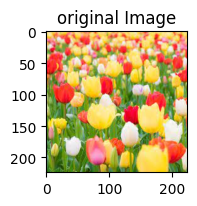

In [ ]:
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.title("original Image")
plt.imshow(original_array)

In [ ]:
#convert image to graysale
model=models.Sequential()
model.add(layers.Conv2D(1,(3,3),activation='relu',input_shape=(224,224,3)))

In [ ]:
model.add(layers.MaxPooling2D((2,2)))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 1)       28        
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 1)       0         
 D)                                                              
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#to reshape the image
input_image=np.expand_dims(original_array,axis=0)
greyscale=model.predict(input_image)

1/1 [==============================] - 0s 176ms/step


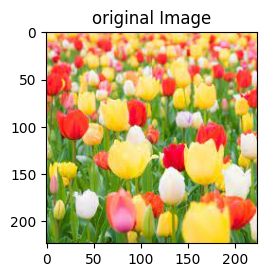

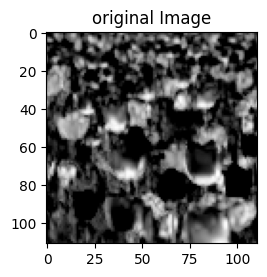

In [ ]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.title("original Image")
plt.imshow(original_array)

plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.title("original Image")
plt.imshow(np.squeeze(greyscale),cmap='gray')

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#project 2:
#detect flowers based on images
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
#model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
#preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization

import cv2
import tensorflow as tf
import random as rn
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X=[]
Z=[]
IMG_SIZE=150

FLOWER_DAISEY_DIR='/content/drive/MyDrive/archive (4)/train/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/archive (4)/train/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/archive (4)/train/tulip'
FLOWER_DANDI_DIR='/content/drive/MyDrive/archive (4)/train/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/archive (4)/train/rose'


In [5]:
def assign_label(img,flower_type):
  return flower_type

In [6]:
#tqdm-->it creates a progress bar from the loop
def make_train_data(flower_type,DIR):
  for img in tqdm(os.listdir(DIR)):
    label=assign_label(img,flower_type)
    path=os.path.join(DIR,img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))

    X.append(np.array(img))
    Z.append(str(label))

In [7]:
make_train_data('Daisy',FLOWER_DAISEY_DIR)
print(len(X))

100%|██████████| 501/501 [00:13<00:00, 35.99it/s] 

501


In [8]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 495/495 [00:15<00:00, 31.23it/s]

996


In [9]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 582/582 [00:13<00:00, 42.22it/s] 

1578


In [10]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 646/646 [00:13<00:00, 47.68it/s]

2224


In [11]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 497/497 [00:11<00:00, 43.82it/s] 

2721


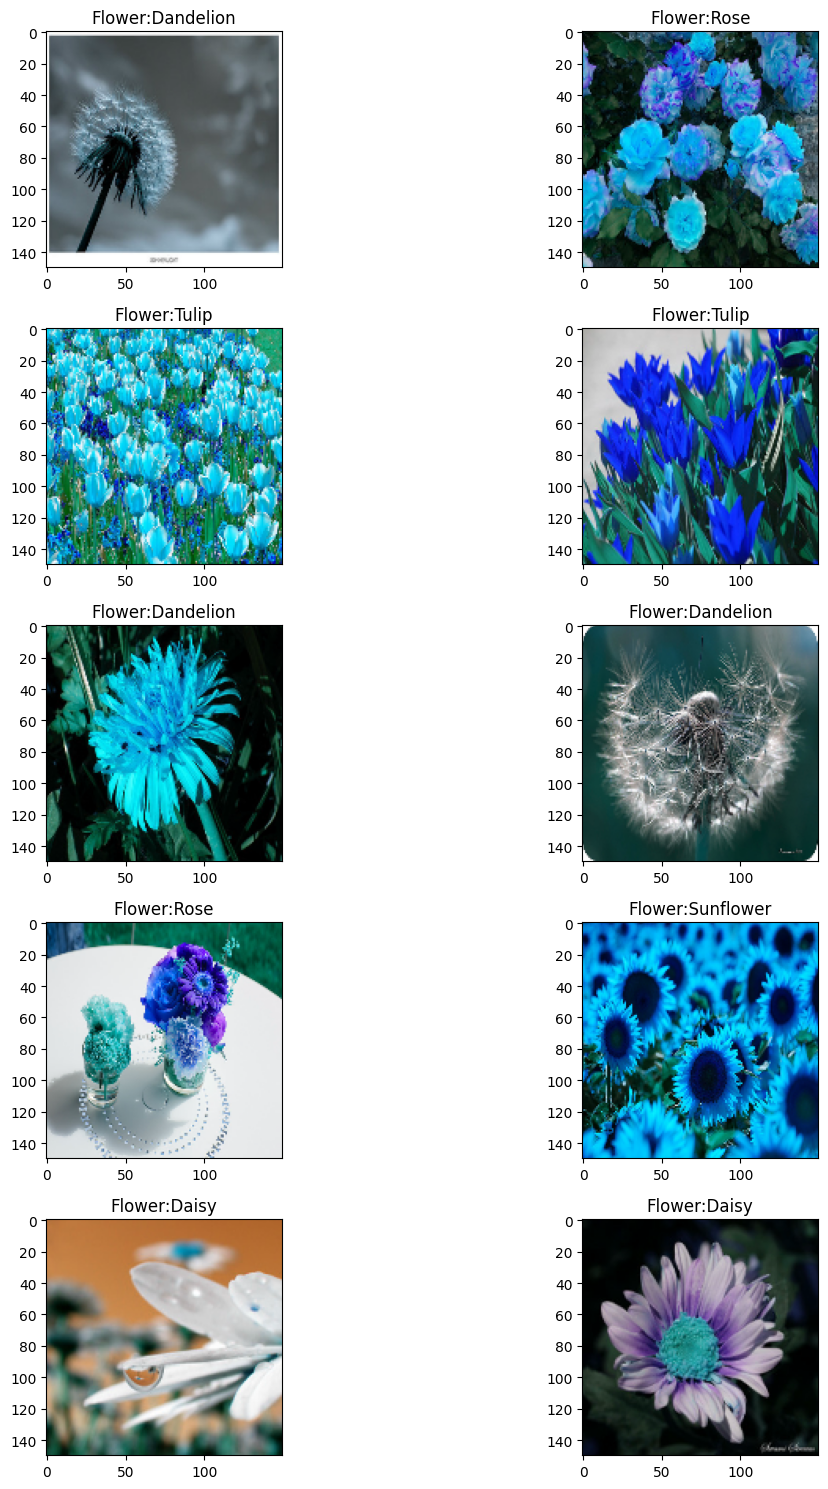

In [15]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)

for row in range(5):
  for col in range(2):
    l=rn.randint(0,len(Z))
    ax[row,col].imshow(X[l])
    ax[row,col].set_title("Flower:"+Z[l])

  plt.tight_layout()